<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Holdout-Cross-Validation-(CV)" data-toc-modified-id="Holdout-Cross-Validation-(CV)-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Holdout Cross-Validation (CV)</a></span></li><li><span><a href="#K-Fold-CV" data-toc-modified-id="K-Fold-CV-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>K-Fold CV</a></span><ul class="toc-item"><li><span><a href="#A-Simple-Demonstration" data-toc-modified-id="A-Simple-Demonstration-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>A Simple Demonstration</a></span></li><li><span><a href="#Example" data-toc-modified-id="Example-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Example</a></span></li></ul></li><li><span><a href="#Stratified-K-Fold" data-toc-modified-id="Stratified-K-Fold-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Stratified K-Fold</a></span><ul class="toc-item"><li><span><a href="#A-Simple-Demonstration" data-toc-modified-id="A-Simple-Demonstration-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>A Simple Demonstration</a></span></li><li><span><a href="#Example" data-toc-modified-id="Example-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Example</a></span></li></ul></li><li><span><a href="#Leave-Group-Out-(K-Fold-on-groups)" data-toc-modified-id="Leave-Group-Out-(K-Fold-on-groups)-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Leave Group Out (K-Fold on groups)</a></span></li><li><span><a href="#Optimizing-Hyperparameters-with-scikit-learn" data-toc-modified-id="Optimizing-Hyperparameters-with-scikit-learn-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Optimizing Hyperparameters with scikit-learn</a></span><ul class="toc-item"><li><span><a href="#GridSearchCV-Example-(Stratified-KFold)" data-toc-modified-id="GridSearchCV-Example-(Stratified-KFold)-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>GridSearchCV Example (Stratified KFold)</a></span></li></ul></li><li><span><a href="#Nested-K-Fold-CV" data-toc-modified-id="Nested-K-Fold-CV-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Nested K-Fold CV</a></span><ul class="toc-item"><li><span><a href="#Getting-a-good-generalization-error-estimate" data-toc-modified-id="Getting-a-good-generalization-error-estimate-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>Getting a good generalization error estimate</a></span></li><li><span><a href="#Using-that-to-compare-different-models" data-toc-modified-id="Using-that-to-compare-different-models-6.2"><span class="toc-item-num">6.2&nbsp;&nbsp;</span>Using that to compare different models</a></span><ul class="toc-item"><li><span><a href="#Option-1:-No-test/train-split" data-toc-modified-id="Option-1:-No-test/train-split-6.2.1"><span class="toc-item-num">6.2.1&nbsp;&nbsp;</span>Option 1: No test/train split</a></span></li><li><span><a href="#Option-2:-Hold-out-some-test-data" data-toc-modified-id="Option-2:-Hold-out-some-test-data-6.2.2"><span class="toc-item-num">6.2.2&nbsp;&nbsp;</span>Option 2: Hold out some test data</a></span></li></ul></li></ul></li><li><span><a href="#Repeated-K-Fold-CV" data-toc-modified-id="Repeated-K-Fold-CV-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Repeated K-Fold CV</a></span><ul class="toc-item"><li><span><a href="#Repeated-CV-decreases-uncertainty-in-error-estimate" data-toc-modified-id="Repeated-CV-decreases-uncertainty-in-error-estimate-7.1"><span class="toc-item-num">7.1&nbsp;&nbsp;</span>Repeated CV decreases uncertainty in error estimate</a></span></li><li><span><a href="#Using-repeats-to-compare-models" data-toc-modified-id="Using-repeats-to-compare-models-7.2"><span class="toc-item-num">7.2&nbsp;&nbsp;</span>Using repeats to compare models</a></span><ul class="toc-item"><li><span><a href="#Nested-CV-example" data-toc-modified-id="Nested-CV-example-7.2.1"><span class="toc-item-num">7.2.1&nbsp;&nbsp;</span>Nested CV example</a></span></li><li><span><a href="#Non-nested-CV-(the-more-common,-simple-repeated-CV)" data-toc-modified-id="Non-nested-CV-(the-more-common,-simple-repeated-CV)-7.2.2"><span class="toc-item-num">7.2.2&nbsp;&nbsp;</span>Non-nested CV (the more common, simple repeated CV)</a></span></li></ul></li></ul></li><li><span><a href="#Bayesian-Comparison" data-toc-modified-id="Bayesian-Comparison-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Bayesian Comparison</a></span></li></ul></div>

In [13]:
from IPython.display import Image
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn.model_selection import cross_val_score

In [14]:
%load_ext watermark
%watermark -t -m -h -v --iversions

The watermark extension is already loaded. To reload it, use:
  %reload_ext watermark
json  2.0.9
numpy 1.17.2
17:36:15 

CPython 3.7.4
IPython 7.8.0

compiler   : GCC 7.3.0
system     : Linux
release    : 4.15.0-128-generic
machine    : x86_64
processor  : x86_64
CPU cores  : 8
interpreter: 64bit
host name  : ski-lab


CV is intended to estimate the generalization error of a model, that is, how well it performs on unseens data. To be accurate, we must avoid testing on data used during model training since the model will be biased to fit that
data.  Various methods of CV exist to balance the amount of effort expended and assumptions made to obtain this estimate.

CV is also critical to performing model selection, that is, the hyperparameters that go into the model itself, such as the depth of decision tree, or regularization strength.

Scikit-learn has a nice discussion available [here](https://scikit-learn.org/stable/modules/cross_validation.html) along with illustrations of the different CV splittings.

Details relating to all of sklearn's model_fitting protocols may be found [here](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.model_selection).

In [18]:
data = datasets.load_breast_cancer()
X, y = data.data, data.target

In [59]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
%matplotlib inline

A global note: all of the following are methods to estimate generalization error.  In practice, production models are often re-trained on the **entire** available datset before being put into production.  Before that, the dataset is divided in different ways to estimate generalization error, as compared below.  We do not always explicitly illustrate this last step here, but this is generally accepted practice.

> A lot of good points are made in this [blog post](https://towardsdatascience.com/a-short-introduction-to-model-selection-bb1bb9c73376) which is also worth the read.

# Holdout Cross-Validation (CV)

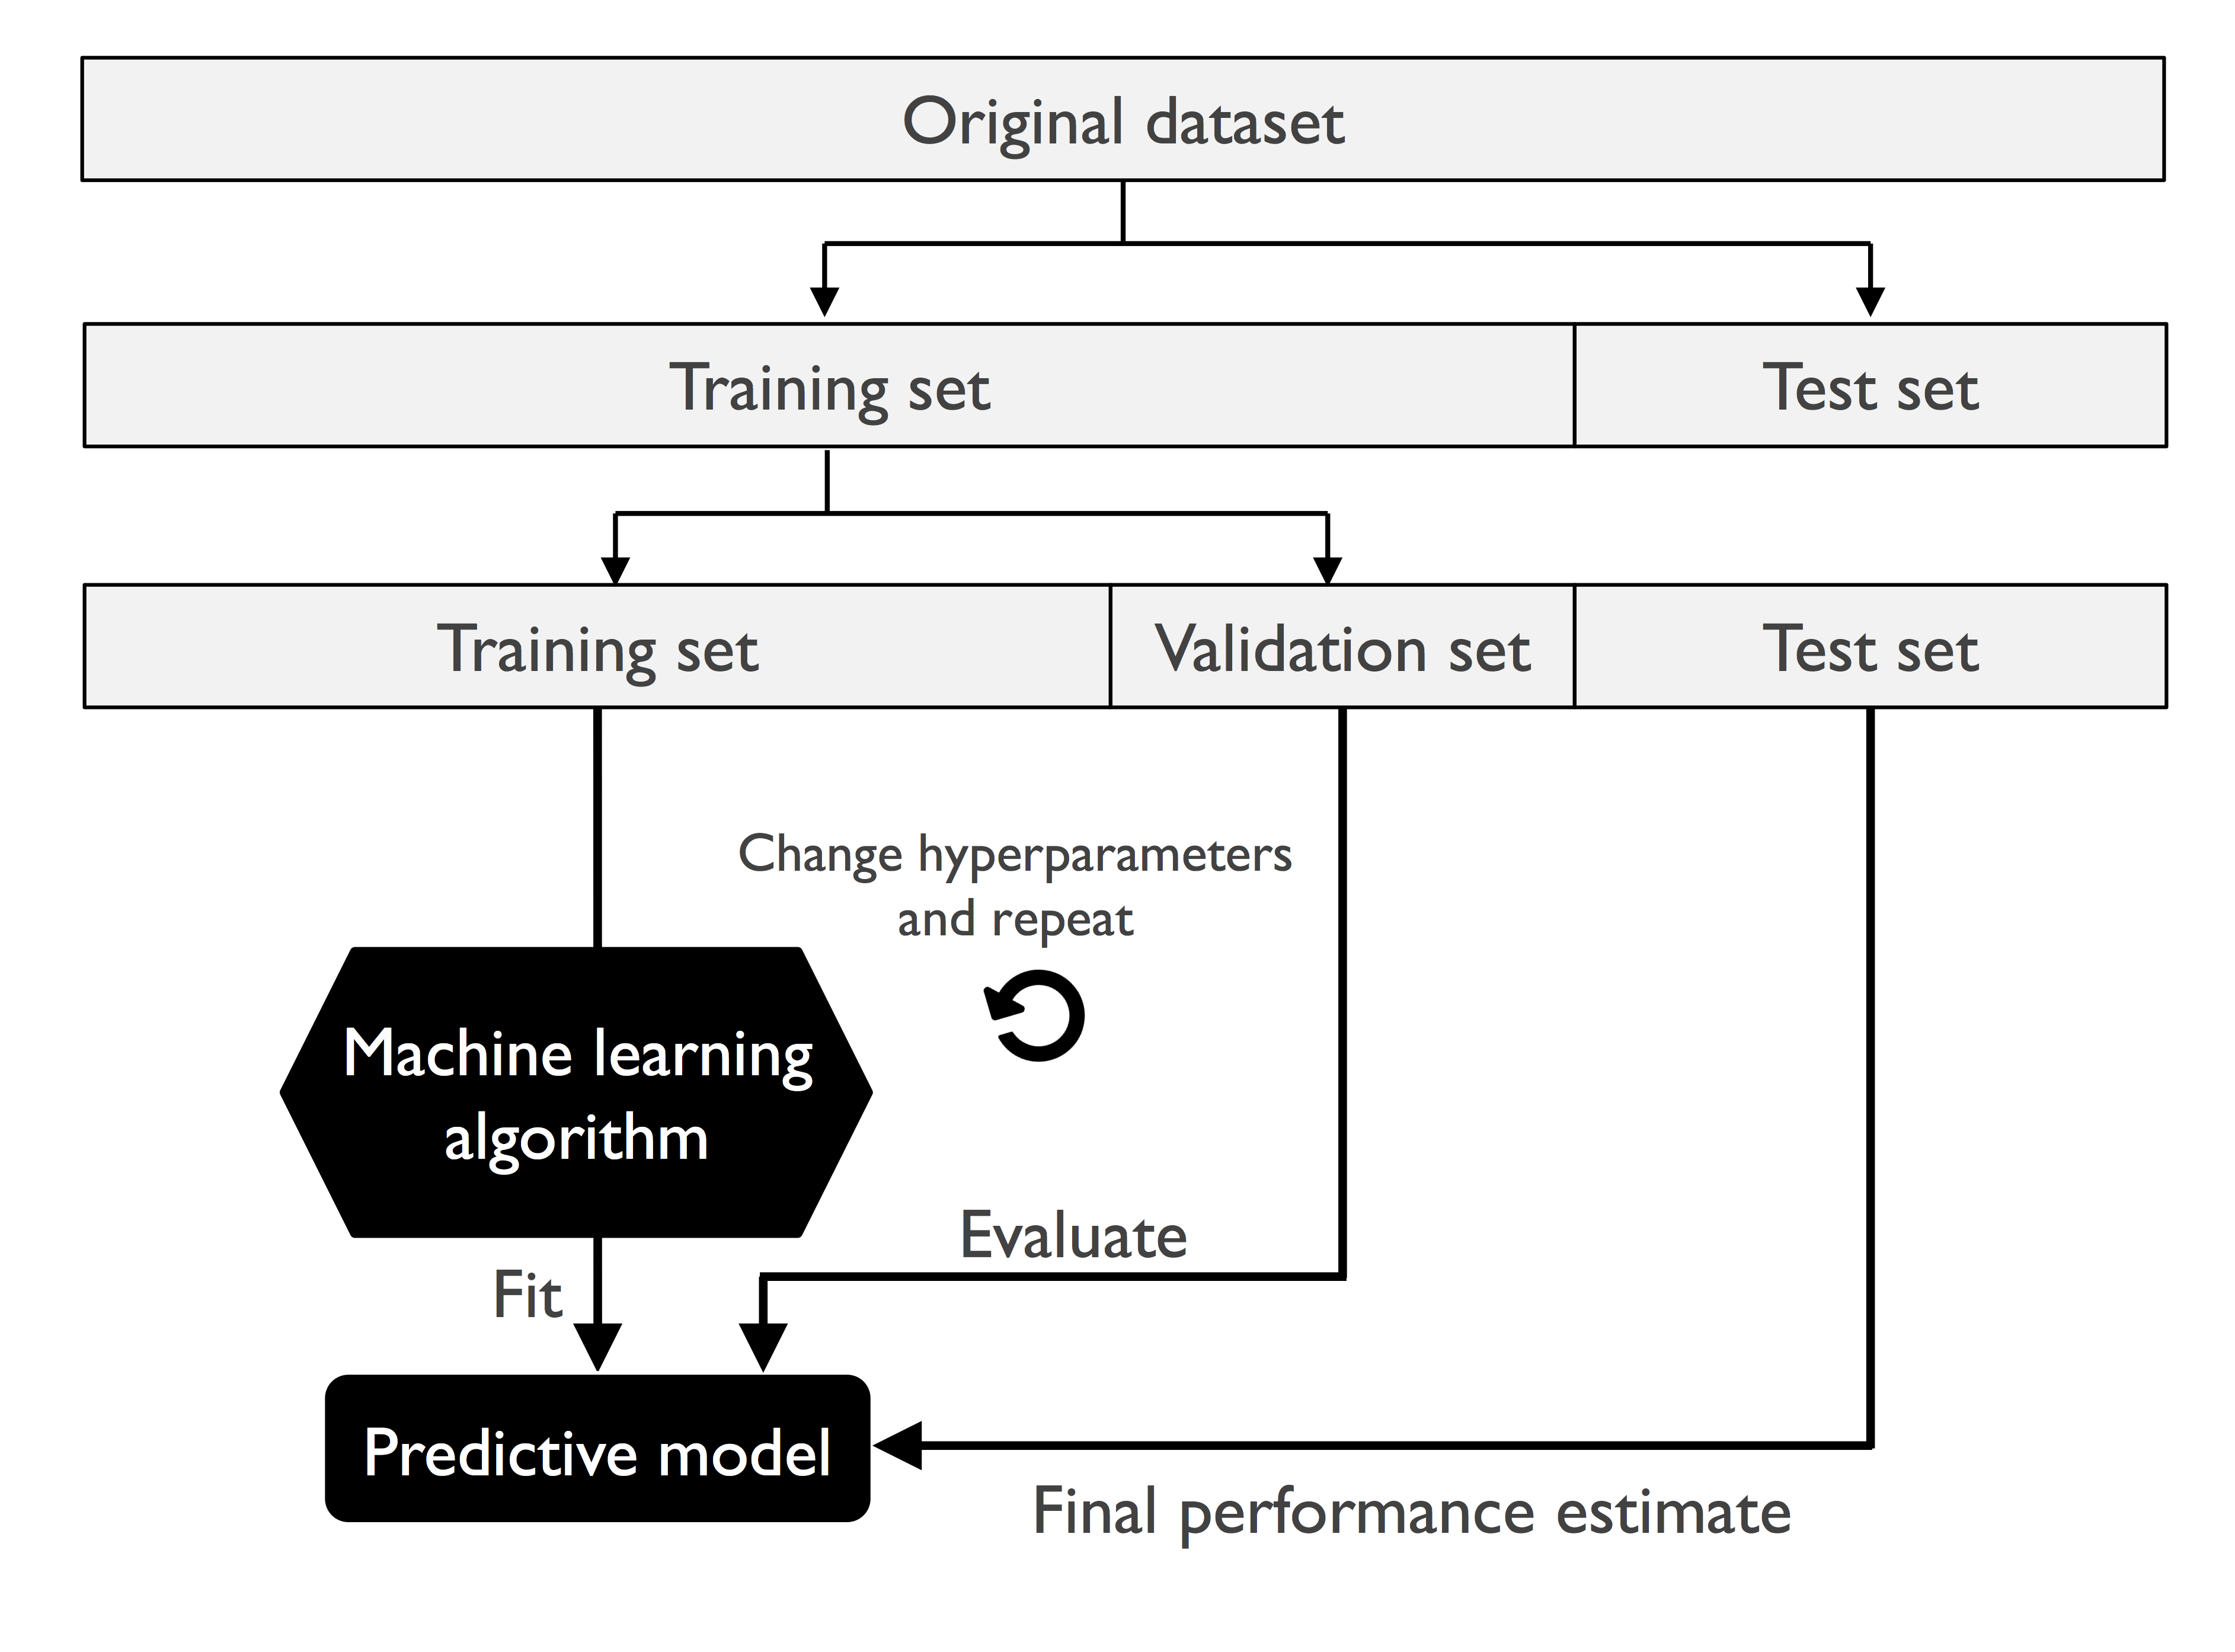

In [8]:
# "Python Machine Learning: Second Edition" by Rashka and Mirjalili (2017)
# See: https://raw.githubusercontent.com/PacktPublishing/Python-Machine-Learning-Second-Edition/master/
Image(filename='pml2_raschka_06_02.png', width=500)

In the "holdout method", an initial dataset is split twice: once into training and testing, and subsequently the former is split again to yield a validation set.  The training set is used to test model hyperparameters, by training on the train set, evaluating on the validation set, then choosing the best models based on validation performance.  The final model can be refit on the entire training set, and its generalization error estimated based on the held out test data.

In [157]:
# First split to get test set
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    shuffle=True,
                                                    random_state=0, 
                                                    test_size=0.2)

# Split again to get validation set
X_train, X_valid, y_train, y_valid = train_test_split(X_train, 
                                                      y_train,
                                                      shuffle=True,
                                                      random_state=0,
                                                      test_size=0.2)

In [158]:
print('Breakdown of {} total data points\nTrain:{}\nValidation:{}\nTest:{}'.format(X.shape[0],
                                                                                  X_train.shape[0],
                                                                                  X_valid.shape[0],
                                                                                  X_test.shape[0]
                                                                                 ))

Breakdown of 569 total data points
Train:364
Validation:91
Test:114


In [159]:
# Assume we have a ML pipeline and we wish to optimize the hyperparameter C.
# Model selection is done in the inner loop as described above.
def my_fit(C, X, y):
    pipeline = Pipeline(steps=[('scaler', StandardScaler()),
                            ('pca', PCA(n_components=2)),
                            ('lr', LogisticRegression(random_state=0, C=C))
                           ])
    pipeline.fit(X, y)
    return pipeline

scores = []
for C in np.logspace(-3,0,10):
    pipeline = my_fit(C, X_train, y_train)
    scores.append([C, pipeline.score(X_valid, y_valid)])
scores = np.array(scores)

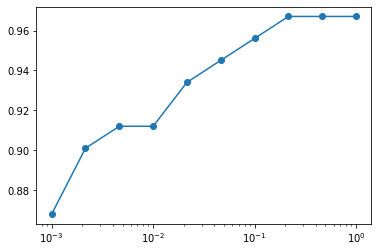

In [160]:
plt.plot(scores[:,0], scores[:,1], 'o-')
plt.xscale('log')

In [161]:
# Choose C and refit on the whole of the training data.
# This refitting is not necessary, but using more data is always best practice.
# Refitting on the entire training set after model selection is a common flag that needs/can be set in many packages.
X_t = np.vstack((X_train, X_valid))
y_t = np.concatenate((y_train, y_valid))
final_model = my_fit(C=scores[-3][0], X=X_t, y=y_t)

In [162]:
print('Final model: {}% test, {}% train'.format('%.2f'%(100*final_model.score(X_test, y_test)),
                                                '%.2f'%(100*final_model.score(X_train, y_train))
                                               ))

Final model: 92.11% test, 95.88% train


# K-Fold CV

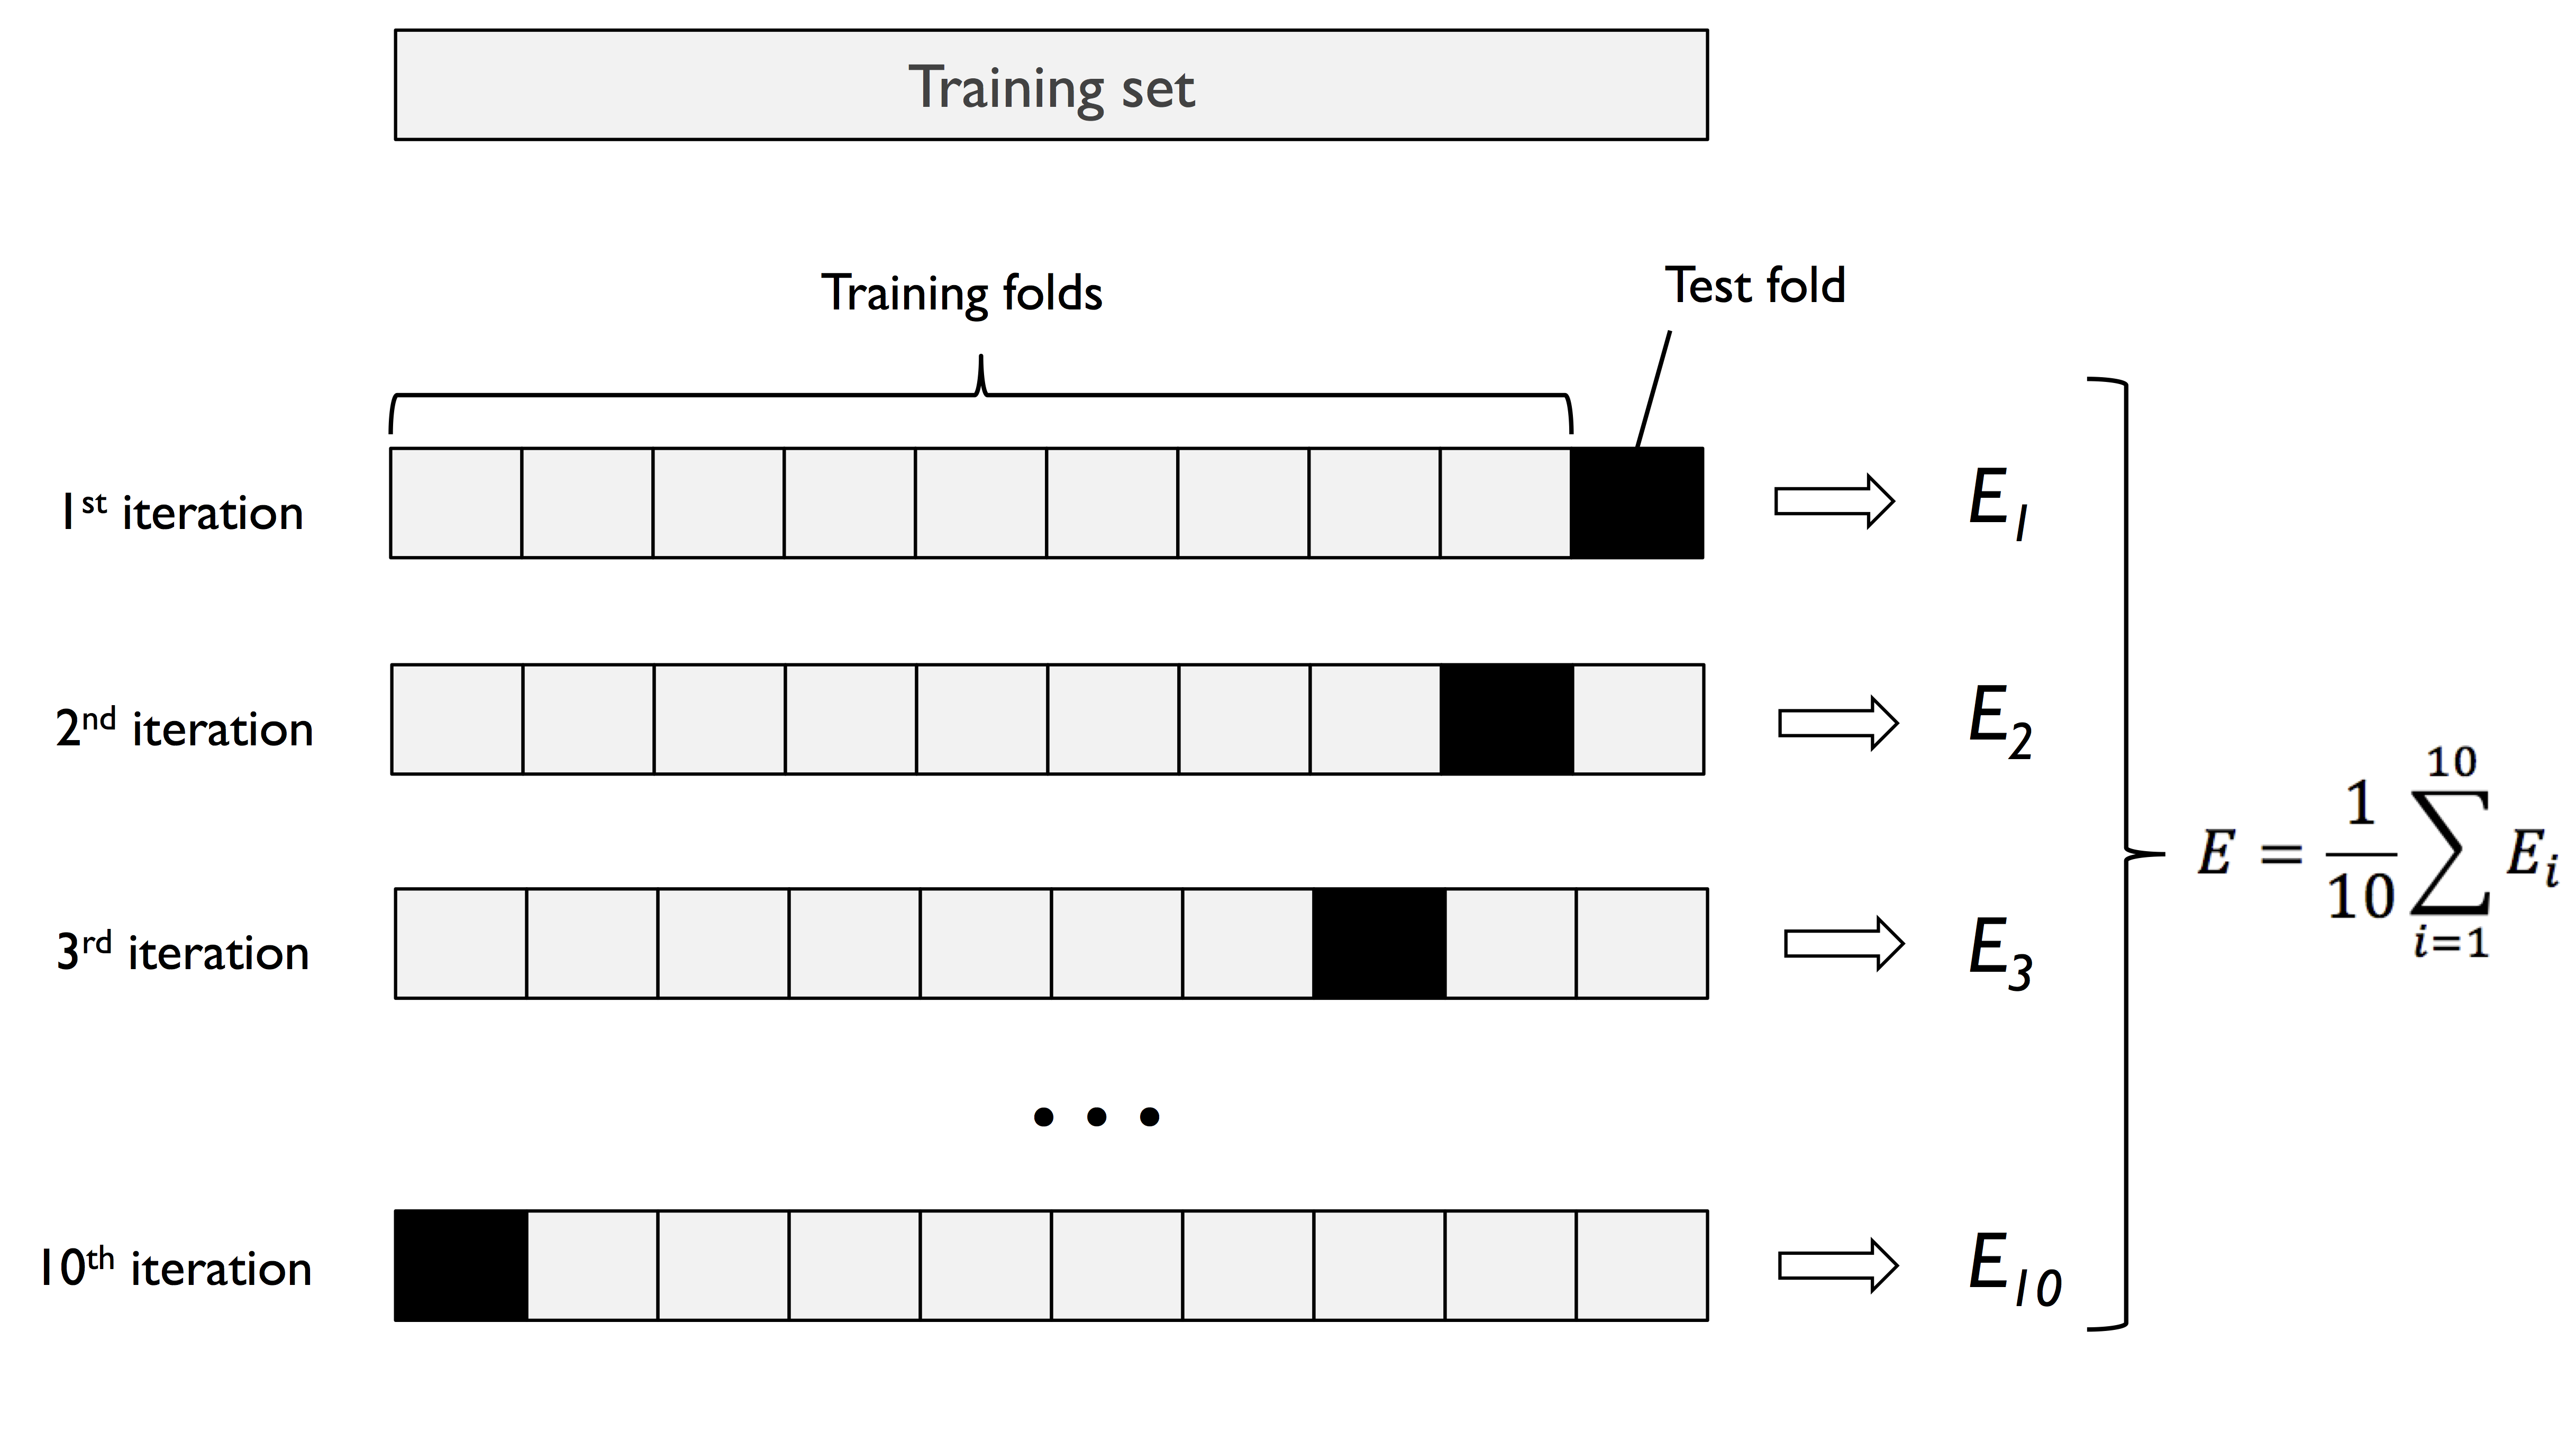

In [163]:
# "Python Machine Learning: Second Edition" by Rashka and Mirjalili (2017)
# See: https://raw.githubusercontent.com/PacktPublishing/Python-Machine-Learning-Second-Edition/master/
Image(filename='pml2_raschka_06_03.png', width=500)

If we have a lot of data that we can split up "fairly" holdout CV may be good enough.  This is generally the fastest CV method and is the least work to perform.  However, in many situations we don't have enough data to justify trusting just one split of the test data (one validation set).  As a result, we may want to split the test set up multiple times so we have several validation sets to evaluate model performance on.  This is done without replacement $k$ times in $k$-fold CV.  Note that we still only have one test set.

During each loop, $(k-1)$/$k$ of the data is used to train the model, and the $1/k$ data is kept as the validation set. The validation performance is then averaged across all $k$ different validation sets to get a mean performance for a given model.  This is repeated for all models we wish to test, and the model (set of hyperparameters) with the lowest generalization error is taken.  This is then re-trained on the entire training set; the generalization error is then reported using the held-out test set.

A good value for $k$ is usually 10, but for smaller datasets increasing $k$ increases the amount of data that goes intro training.  Using smaller $k$ goes faster, but can result in a poorer estimate of model performance if the data between the splits varies significantly.

If $k = n$, where $n$ is the number of training points, we have [leave out one cross validation](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.LeaveOneOut.html).

## A Simple Demonstration

In [164]:
X_dummy = np.array([[1,1,1],[2,2,2],[3,3,3],[4,4,4]])
y_dummy = np.arange(4)

In [165]:
X_dummy

array([[1, 1, 1],
       [2, 2, 2],
       [3, 3, 3],
       [4, 4, 4]])

In [166]:
from sklearn.model_selection import KFold
k = KFold(n_splits=4, shuffle=False)

In [167]:
for train_index, test_index in k.split(X_dummy):
    print(train_index, test_index)
    X_train, X_test = X_dummy[train_index], X_dummy[test_index]
    y_train, y_test = y_dummy[train_index], y_dummy[test_index]

[1 2 3] [0]
[0 2 3] [1]
[0 1 3] [2]
[0 1 2] [3]


In [168]:
# The split can also shuffle and randomize X if desired
# Shuffling is actually default in sklearn
k = KFold(n_splits=2, shuffle=True, random_state=0)
for train_index, test_index in k.split(X_dummy):
    print(train_index, test_index)
    X_train, X_test = X_dummy[train_index], X_dummy[test_index]
    y_train, y_test = y_dummy[train_index], y_dummy[test_index]

[0 1] [2 3]
[2 3] [0 1]


## Example

In [171]:
# First, split to get test set
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    shuffle=True,
                                                    random_state=0, 
                                                    test_size=0.2)
# Second, perform k-fold CV on training set
k = KFold(n_splits=10, shuffle=True, random_state=0)

kf_scores = []
for C in np.logspace(-3,2,10):
    # Split into k-folds
    scores = []
    for train_index, test_index in k.split(X_train):
        X_train_, X_valid_ = X_train[train_index], X_train[test_index]
        y_train_, y_valid_ = y_train[train_index], y_train[test_index]
        pipeline = my_fit(C, X_train_, y_train_)
        scores.append(pipeline.score(X_valid_, y_valid_))
        
    # Average score over all folds
    ave_validation_acc = np.mean(scores)
    kf_scores.append([C, ave_validation_acc])
kf_scores = np.array(kf_scores)

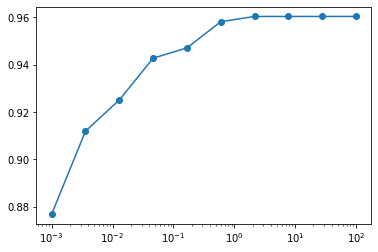

In [172]:
plt.plot(kf_scores[:,0], kf_scores[:,1], 'o-')
plt.xscale('log')

In [173]:
# Third, retrain selected model on all of training data
# At this point, the best model has only been trained on (k-1)/k of the training data
final_model = my_fit(C=kf_scores[-4][0], X=X_train, y=y_train)

# Fourth, report generalization error using test set
print('Final model: {}% test, {}% train'.format('%.2f'%(100*final_model.score(X_test, y_test)),
                                                '%.2f'%(100*final_model.score(X_train, y_train))
                                               ))

Final model: 92.11% test, 96.70% train


# Stratified K-Fold

In stratified k-fold, the class proportions in each fold are maintained.  This is only relevant for classification tasks.  Stratification is a **default setting** for most scikit-learn funtions or splittings so it often happens behind the scenes.  Check the documentation for specific function implementations.

Here is [sklearn's documentation](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.StratifiedKFold.html#sklearn.model_selection.StratifiedKFold).

They also offer a visual comparison of different strategies [here](https://scikit-learn.org/stable/modules/cross_validation.html#cross-validation-iterators).

## A Simple Demonstration

In [194]:
X_dummy = np.array([[1,1,1],[2,2,2],[3,3,3],[4,4,4]])
y_dummy = np.array(['A','A','B','B'])

In [209]:
from sklearn.model_selection import StratifiedKFold
k = StratifiedKFold(n_splits=2, shuffle=True, random_state=0)

In [210]:
# Each split follows a 50:50 distribution
for train_index, test_index in k.split(X_dummy, y_dummy):
    X_train, X_test = X_dummy[train_index], X_dummy[test_index]
    y_train, y_test = y_dummy[train_index], y_dummy[test_index]
    print(train_index, test_index, y_train)

[0 3] [1 2] ['A' 'B']
[1 2] [0 3] ['A' 'B']


## Example

In [177]:
# First, split to get test set
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    stratify=y, # <-- Now stratifying here also - cannot shuffle
                                                    random_state=0, 
                                                    test_size=0.2)
# Second, perform k-fold CV on training set
k = StratifiedKFold(n_splits=10, shuffle=True, random_state=0)

kf_scores = []
for C in np.logspace(-3,2,10):
    # Split into k-folds
    scores = []
    for train_index, test_index in k.split(X_train, y_train):
        X_train_, X_valid_ = X_train[train_index], X_train[test_index]
        y_train_, y_valid_ = y_train[train_index], y_train[test_index]
        pipeline = my_fit(C, X_train_, y_train_)
        scores.append(pipeline.score(X_valid_, y_valid_))
        
    # Average score over all folds
    ave_validation_acc = np.mean(scores)
    kf_scores.append([C, ave_validation_acc])
kf_scores = np.array(kf_scores)

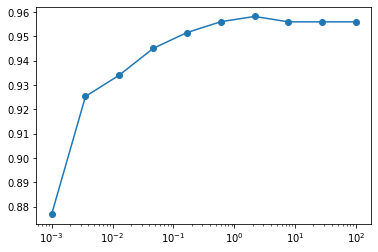

In [178]:
plt.plot(kf_scores[:,0], kf_scores[:,1], 'o-')
plt.xscale('log')

In [179]:
# Third, retrain selected model on all of training data
final_model = my_fit(C=kf_scores[-4][0], X=X_train, y=y_train)

# Fourth, report generalization error using test set
print('Final model: {}% test, {}% train'.format('%.2f'%(100*final_model.score(X_test, y_test)),
                                                '%.2f'%(100*final_model.score(X_train, y_train))
                                               ))

Final model: 92.11% test, 96.04% train


# Leave Group Out (K-Fold on groups)

We can also define groups and repeat this process at a "group" level, where groups can be arbitrarily defined. See [here](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GroupKFold.html#sklearn.model_selection.GroupKFold) for scikit-learn's example.

This can be helpful if we wish to study create classifiers on the basis of collections and estimate that they generalize well to collections not seen during training.  For example, training on some chemical data that has sets of molecules or atoms and trying to make sure the model can generalize to classes of molecules (e.g., ethers, carboxylic acids, etc.) not used during model fitting.

Pushing it to the limit $k = g$ where $g$ is the number of groups results in [leave one group out](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.LeaveOneGroupOut.html#sklearn.model_selection.LeaveOneGroupOut) CV.

A visualization is also discussed [here](https://scikit-learn.org/stable/modules/cross_validation.html#cross-validation-iterators), along with some caveats, such as the fact that folds do not always have the same size.

# Optimizing Hyperparameters with scikit-learn

sklearn has built in functions to do this optimization, and not just on one parameter at a time. At the moment, there are three approaches: (1) [GridSearch](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html#sklearn.model_selection.GridSearchCV), (2) [RandomizedSearch](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html#sklearn.model_selection.RandomizedSearchCV), and (3) [HalvingGridSearch](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.HalvingGridSearchCV.html#sklearn.model_selection.HalvingGridSearchCV) (also has randomized variant).  (1) is a brute force search over a grid of parameter values.  It has been argued that the true optimum rarely fall on regularly chosen grids so (2) random searching can be better.  While (3) attempts to find the optimum searching through space by halving.

According to [sklearn's documentation](https://scikit-learn.org/stable/modules/grid_search.html#randomized-parameter-search), there are 2 main benefits of (2) over (1):
* A budget can be chosen independent of the number of parameters and possible values.
* Adding parameters that do not influence the performance does not decrease efficiency.
See their [example](https://scikit-learn.org/stable/auto_examples/model_selection/plot_randomized_search.html#sphx-glr-auto-examples-model-selection-plot-randomized-search-py) for demonstration.

(3) is still experimental at this point, but sklearn includes a discussion [here](https://scikit-learn.org/stable/modules/grid_search.html#successive-halving-user-guide).

By far, (1) is the most common approach, though there is good reason to be more preicse if possible. In fact, it is possible to employ other optimization approaches such as Gaussian process optimization to do even better.  There are standard packages such as [auto-sklearn](https://github.com/automl/auto-sklearn), a complete Auto-ML framework, GPy and [GPyOpt](https://sheffieldml.github.io/GPyOpt/), or [hyperopt-sklearn](https://github.com/hyperopt/hyperopt-sklearn) that can perform this optimization and are essentially just wrappers around the sklearn library.

## GridSearchCV Example (Stratified KFold)

In [188]:
from sklearn.model_selection import GridSearchCV

pipeline = Pipeline(steps=[('scaler', StandardScaler()),
                            ('pca', PCA(n_components=2)),
                            ('lr', LogisticRegression(random_state=0, C=C))
                           ])

gs = GridSearchCV(estimator=pipeline,
                  param_grid=[{'lr__C':np.logspace(-5,-1,10),
                               'pca__n_components':[1],
                               'scaler__with_std':[False]
                              },
                              {'lr__C':np.logspace(-3,2,10),
                               'pca__n_components':[1,2],
                               'scaler__with_std':[True]
                              }
                             ], # This can be extended to multiple dicts of parameter grids
                  cv=10, # k-fold Stratified CV - can also specify specific sklearn CV object (see documentation)
                  n_jobs=-1 # Use all available processors
                  refit=True # Automatically refit the best model found on the entire training set (default)
                 )

# First, split to get test set
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    stratify=y, # <-- Now stratifying here also - cannot shuffle
                                                    random_state=0, 
                                                    test_size=0.2)

# Second, invoke GridSearch
_ = gs.fit(X_train, y_train)

In [190]:
# The GridSearch object retains which parameters were optimal and what the best validation score was in CV
print(gs.best_params_)
print(gs.best_score_)

{'lr__C': 7.742636826811277, 'pca__n_components': 2, 'scaler__with_std': True}
0.9560869565217391


In [193]:
# Third, [SKIP] --> refit=True means re-trainin already done!

# Fourth, report generalization error using test set
# The GridSearch object may be called directly which involes the best (retrained) model
print('Final model: {}% test, {}% train'.format('%.2f'%(100*gs.score(X_test, y_test)),
                                                '%.2f'%(100*gs.score(X_train, y_train))
                                               ))

Final model: 92.11% test, 96.04% train


# Nested K-Fold CV

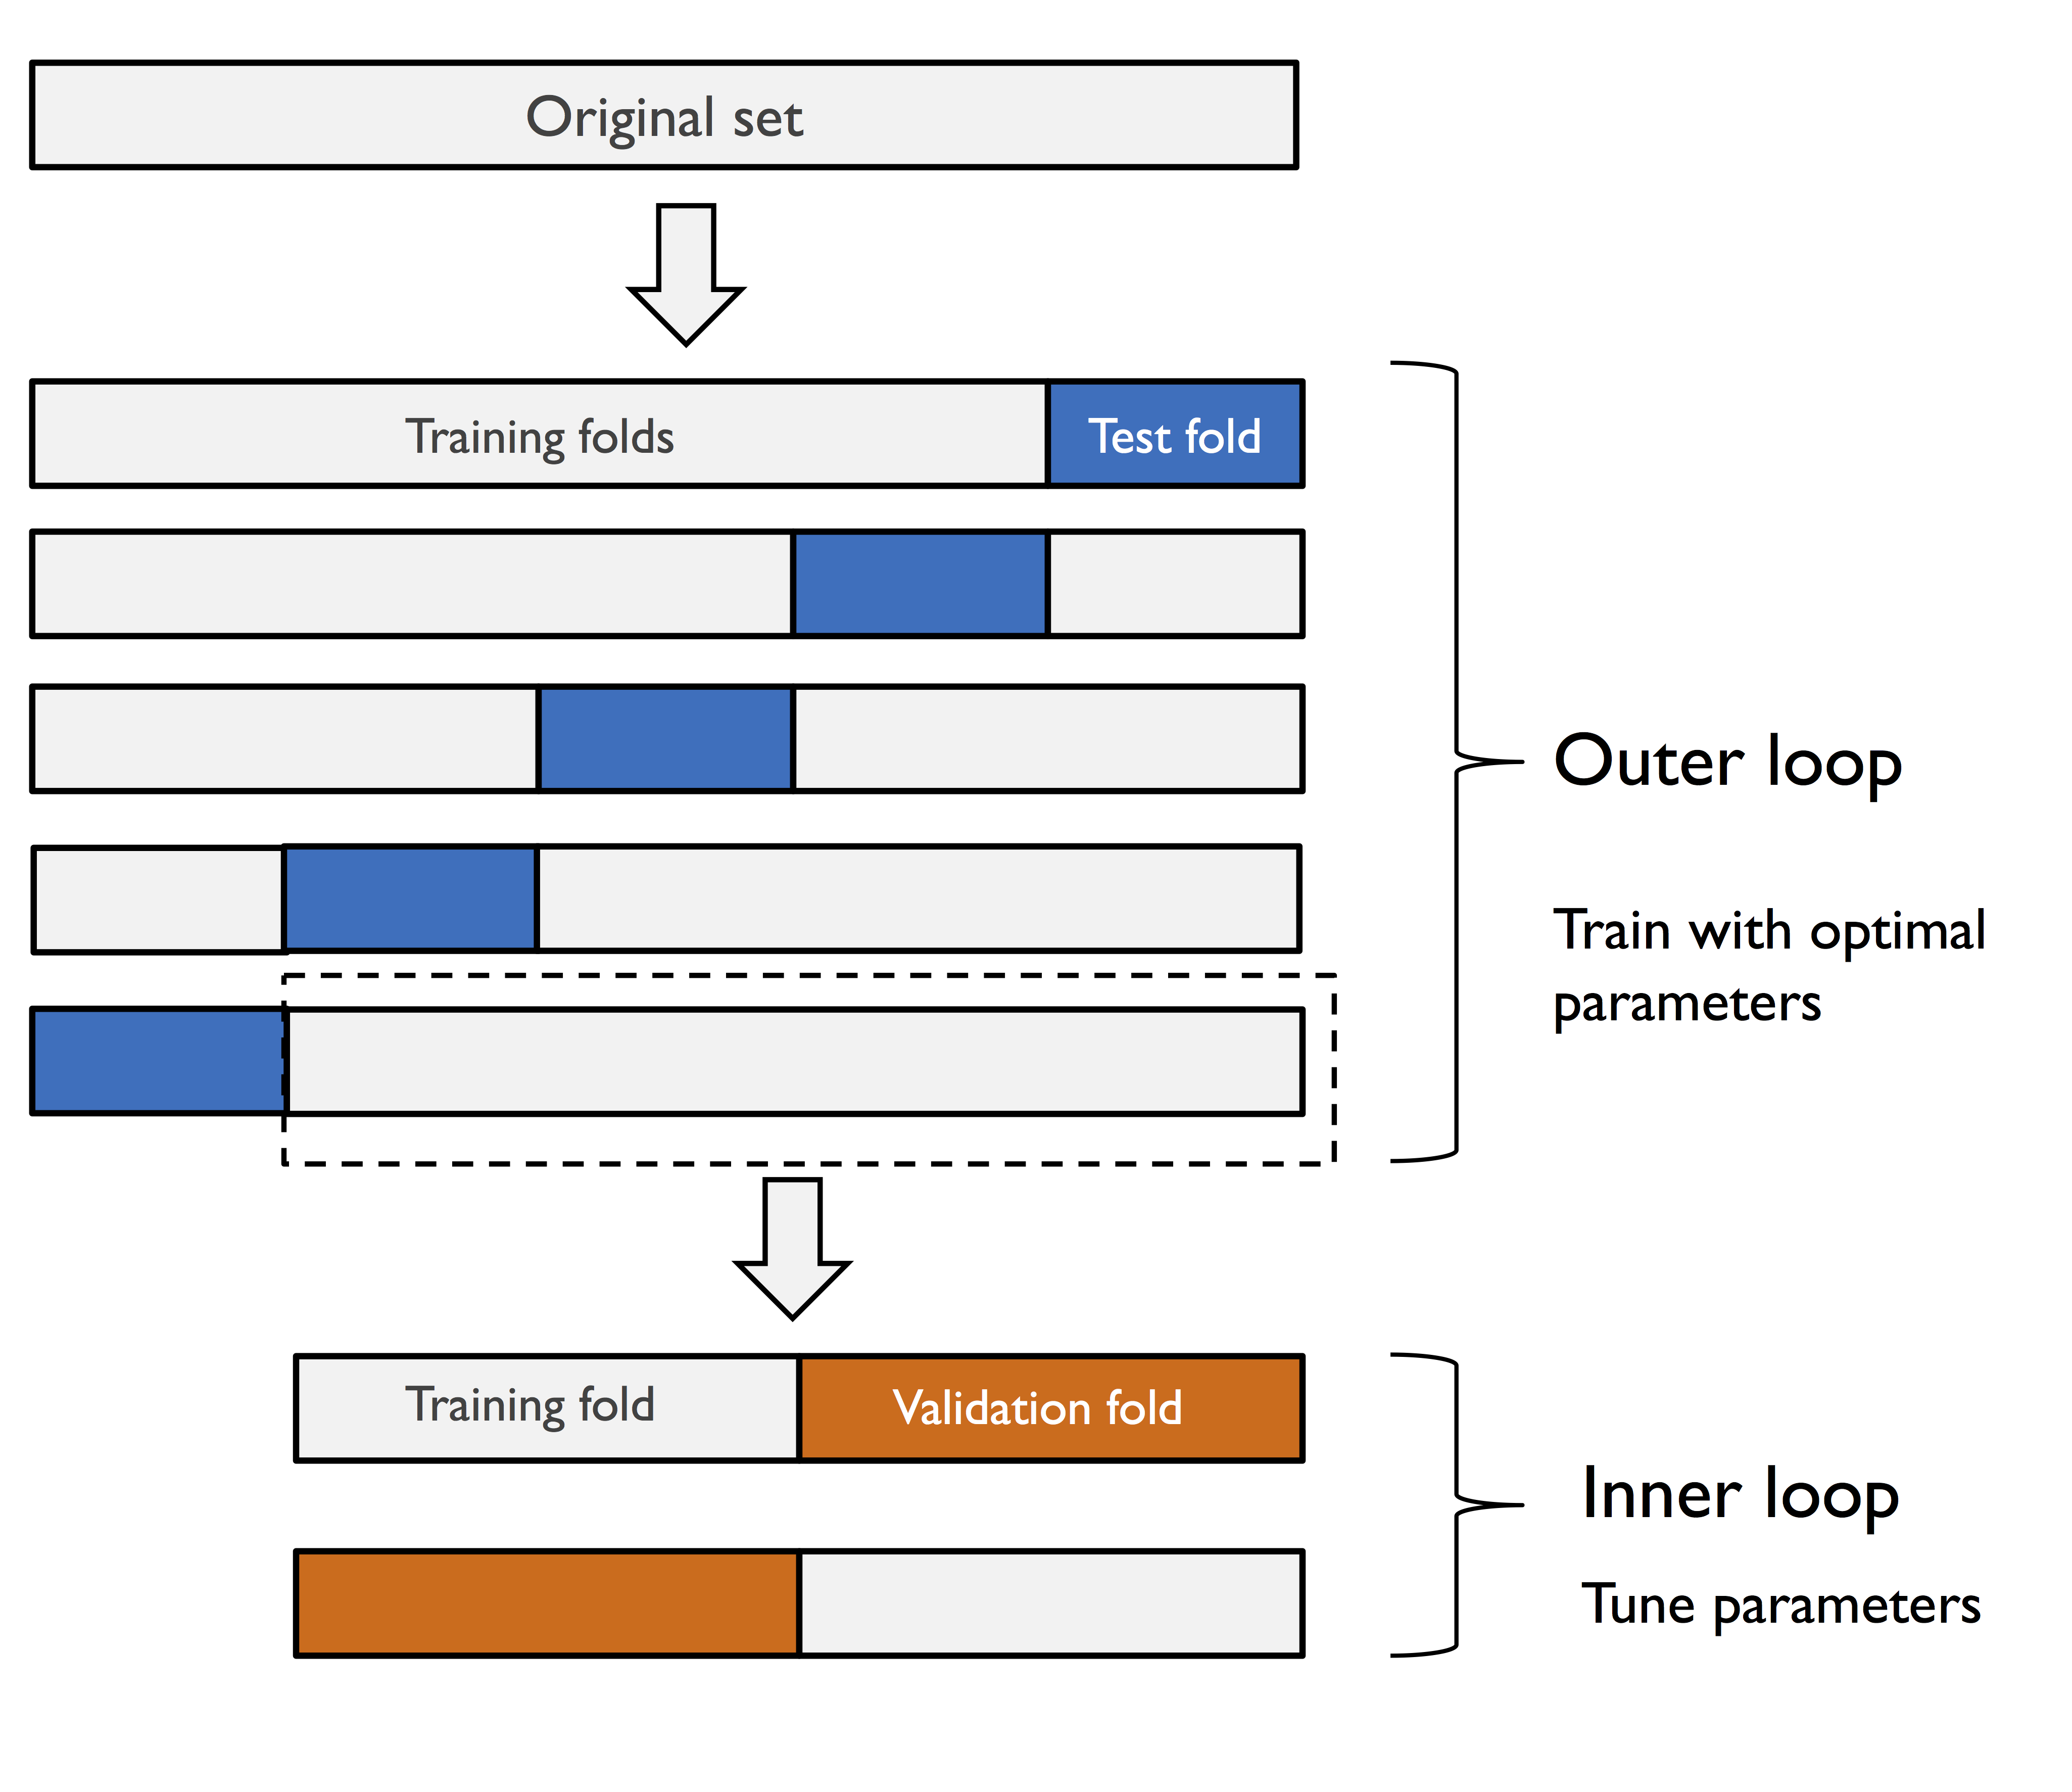

In [10]:
# "Python Machine Learning: Second Edition" by Rashka and Mirjalili (2017)
# See: https://raw.githubusercontent.com/PacktPublishing/Python-Machine-Learning-Second-Edition/master/
Image(filename='pml2_raschka_06_07.png', width=500)

# Here, "original set" may 
# (1) refer to the training set after the initial holding out of a separate test set (better).
# (2) refer to the entire dataset (if data is sparse).

What is nested CV?

---

**The terminology and application of principles seems to vary widely which leads to confusion.  To the best of my knowledge, here are the differences.**

CV is useful for estimating generalization error, and thus, tuning model hyperparameters to find the best set.  However, if we wish to compare multiple different models (like LogisticRegression vs. SVC or a Neural Network), we need to do something a little different.  The reason is because the generalization error computed via the test set after k-fold CV described above can still be a little biased based on how that split occured (first split into test/train).  The above image illustrates the idea of nested CV, which is designed to combat this.

Here, we have an outer loop which generates different test sets, while the remainder is split into training/validation folds.  A single loop of the outer loop is essentially what we were doing before.  Now we are repeating this exercise to see what happens if we have different ("held out") test sets.  This is an even better way to estimate generalization error (what to expect in the real world once a model is shown unseen data). 

> As stated in [sklearn's documentation](https://scikit-learn.org/stable/auto_examples/model_selection/plot_nested_cross_validation_iris.html): "Nested CV estimates the generalization error of the underlying model (via outer loop) and its (hyper)parameter search (via inner loop). ...\[N\]ested CV effectively uses a series of train/validation/test set splits. In the inner loop, the score is approximately maximized by fitting a model to each training set, and then directly maximized in selecting (hyper)parameters over the validation set. In the outer loop, generalization error is estimated by **averaging** test set scores over several dataset splits."

The above commentary also states that "Model selection without nested CV uses the same data to tune model parameters and evaluate model performance. Information may thus 'leak' into the model and overfit the data. The magnitude of this effect is primarily dependent on the size of the dataset and the stability of the model."  They refer to this [paper](http://jmlr.csail.mit.edu/papers/volume11/cawley10a/cawley10a.pdf) by Cawley and Talbot (2010).

This seems confusing because the way we have so far described the approach we are NOT using the same data to tune (k-fold CV on train) and evaluate (held out test set) the model.  The ambiguity seems to come from communities where data is hard to come by, so having a separate held out test set is not possible (chemometrics, etc. fields are good examples).  Instead, they just do the CV over the entire dataset and take the CV performance of the best model as the generalization error.  Thus, the model is trained an evaluated on the same data by only performing the inner loop above (imagine that only gray and orange blocks exist).  Of course, this is biased and a bad way to do things, asillustrated in the example below - that's why we hold out a test set to estimate the generalization error.

However, nested CV is still important even if we don't commit this error. Previously, we always had to hold out a chunk of data that was unseen (test) to get a generalization error we would report (the value inside k-fold CV loop is just to decide which parameters to use and is not reported).  However, **here we don't need to hold out anything.**  This seems to contradict the issue raised in the last paragraph. If you held out a test set initially, you could report that number if you wanted, but I think the spirit of this approach is to let you use the entire dataset.  Nested CV essentially lets you get an average rather than relying on a single held out test set, and lets you make use of the entire dataset.  Note that is still best practice to always have a held out test set anyway.

Importantly, on one outer loop the inner loop will decide the hyperparameters for a model (like C for LR), but another loop might find a completely different value for this.  This does not matter.  Ultimately, all we are trying to get here is the final **generalization error estimate**.  A final model will actually be trained using all the data (nothing held out) and we simply report that model's error (even though it hasn't actually been tested on anything) as the error from the nested CV since that number is a nearly unbiased estimate of this. Thus, if we compute the error using nested CV for several different ML models, we have an estimate of how well one sort of model generalizes vs. another (like Logistic Regression vs. SVC).  

It is common practice to just take the best model found in the nested CV without retraining it because the logic is that it shouldn't depend on the data split that much.  This is not always true of course, especially if we have a very small amount of data. **Optimally, you would do another set of k-fold CV on the dataset to identify the best hyperparameters unambiguously, then retrain that model on the entire data set to produce the final production model.**  

In summary: if we only did "vanilla k-fold CV" as previously described we would have only 1 test set.  If we used the generalization error computed from that we have no sense of the uncertainty in that number. If the accuracy of model A is 95% and model B returns 95.1% is that statistically significant?  We don't know.  With nested CV we can get a standard deviation and so something like the "one standard deviation rule" to choose an algorithm to use.  In this example we will use the standard deviation of the outer loop results as estimate of this, but this is biased because the inner loop data (orange + gray blocks) is not disjoint between iterations.  The inner loop (gray blocks) ARE disjoint in the case of k=2, which can be a convient choice.  We will address these correlation later.

See additional discussion [here](#https://towardsdatascience.com/a-short-introduction-to-model-selection-bb1bb9c73376).

Sebastian Raschka provides additional commentary on the question [here](https://sebastianraschka.com/faq/docs/evaluate-a-model.html).

Also see this [discussion](https://stats.stackexchange.com/questions/65128/nested-cross-validation-for-model-selection) on stackexchange.

Jason Brownlee also has a nice discussion [here](https://machinelearningmastery.com/nested-cross-validation-for-machine-learning-with-python/).

---
Here is a logical flow from the start of the notebook to here:

* Idea 1: Take all of X, fit it, report the fit ($R^2$, etc.) of that as generalization error.
* Problem 1: This is bad because that fit metric is biased toward the data since it was optimized to fit it.
* Solution 1: Keep some out and test against that instead.


* Idea 2: That works if you have no adjustable parameter in the model, or just want to keep them fixed at some value(s). But if you need to adjust them?
* Problem 2: Again, testing on the same set that you perform the loss function minimization on creates bias.
* Solution 2: Hold out another chunk of data (validation set) to test performance of a given set of model parameters with while performing the loss function minimization (model fitting) on another set (train set).  This is the holdout method we presented first (one blue, gray, orange chunk above).


* Idea 3: What if I don't have an enormous amount of data?  
* Problem 3: The splits you performed above might not be a perfect average of  all the scenarios in the real world and if you over/under represent some you will have bias.
* Solution 3: Do repeated splitting of the training data into disjoint train/validation sets.  This is k-fold cross validation (one blue, multiple gray and orange chunks above).


* Problem 4: So that splitting solved the issue of when you do the "second" division (first = test/train split, second = split training further into training/validation), but what about the first split?  Don't we have the same issue? 
* Solution: Yes. And again, the solution is the same - do repeated, disjoint splits of the data so we can average any bias out as best we can.  This is nested (k-fold) CV (multiple blue, gray, and orange chunks).


> There is no subsitute for more data.  These are all band-aids to solve the original problem of being data-limited.  If we really do have **a lot of data** we can just use the test/train/validation (holdout) method.  In fact, in the limit of infinite data, no subset would create bias and therefore we could just fit to the entire dataset and report the fitting error ($R^2$ or the like).  This is because you "know" everything (all the data) - but in this case, why do you need a model?

## Getting a good generalization error estimate

The following example comes directly from [sklearn's documentation](https://scikit-learn.org/stable/auto_examples/model_selection/plot_nested_cross_validation_iris.html).  It compares nested and non-nested CV many times to illustrate that nested CV consistently outperforms (is NOT overly optimistic) compared to the non-nested CV number. Under normal circumstances, do you NOT need to repeat this many times (NUM_TRIALS=1). In the example below, the latter is taken directly from the inner loop which is why it is biased.  So far, we have otherwise advocating using a test set instead to avoid this.

**Stratified K-Fold would also be better, but is not implemented below.**

In [218]:
from sklearn.datasets import load_iris
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, cross_val_score, KFold
import numpy as np

def sklearn_nested_cv_example(k_inner=4, k_outer=4):
    # Number of random trials
    NUM_TRIALS = 30

    # Load the dataset
    iris = load_iris()
    X_iris = iris.data
    y_iris = iris.target

    # Set up possible values of parameters to optimize over
    p_grid = {"C": [1, 10, 100],
              "gamma": [.01, .1]}

    # We will use a Support Vector Classifier with "rbf" kernel
    svm = SVC(kernel="rbf")

    # Arrays to store scores
    non_nested_scores = np.zeros(NUM_TRIALS)
    nested_scores = np.zeros(NUM_TRIALS)

    # Loop for each trial
    for i in range(NUM_TRIALS):

        # Choose cross-validation techniques for the inner and outer loops,
        # independently of the dataset.
        # E.g "GroupKFold", "LeaveOneOut", "LeaveOneGroupOut", etc.
        inner_cv = KFold(n_splits=k_inner, shuffle=True, random_state=i)
        outer_cv = KFold(n_splits=k_outer, shuffle=True, random_state=i)

        # Non_nested parameter search and scoring
        clf = GridSearchCV(estimator=svm, param_grid=p_grid, cv=inner_cv)
        clf.fit(X_iris, y_iris)
        non_nested_scores[i] = clf.best_score_

        # A better approach is to use, but nested CV is even better than that!
        # Retrain on all of training set (train+validation), then:
        # score = clf.score(X_test, y_test)

        # Nested CV with parameter optimization
        # See how ther was NO INITIAL TEST/TRAIN SPLIT!
        nested_score = cross_val_score(clf, X=X_iris, y=y_iris, cv=outer_cv)
        nested_scores[i] = nested_score.mean()

    score_difference = non_nested_scores - nested_scores

    print("Average difference of {:6f} with std. dev. of {:6f}."
          .format(score_difference.mean(), score_difference.std()))

    # Plot scores on each trial for nested and non-nested CV
    plt.figure(figsize=(8,6))
    plt.subplot(211)
    non_nested_scores_line, = plt.plot(non_nested_scores, color='r')
    nested_line, = plt.plot(nested_scores, color='b')
    plt.ylabel("score", fontsize="14")
    plt.legend([non_nested_scores_line, nested_line],
               ["Non-Nested CV", "Nested CV"],
               bbox_to_anchor=(0, .4, .5, 0))
    plt.title("Non-Nested and Nested Cross Validation on Iris Dataset",
              x=.5, y=1.1, fontsize="15")

    # Plot bar chart of the difference.
    plt.subplot(212)
    difference_plot = plt.bar(range(NUM_TRIALS), score_difference)
    plt.xlabel("Individual Trial #")
    plt.legend([difference_plot],
               ["Non-Nested CV - Nested CV Score"],
               bbox_to_anchor=(0, 1, .8, 0))
    plt.ylabel("score difference", fontsize="14")
    plt.tight_layout()

Average difference of 0.007581 with std. dev. of 0.007833.


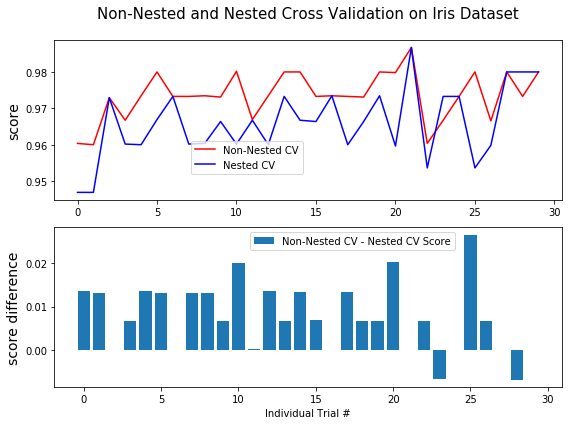

In [219]:
# 4x4 nested CV is what is used in sklearn's example
sklearn_nested_cv_example(k_inner=4, k_outer=4)

Average difference of 0.008000 with std. dev. of 0.015434.


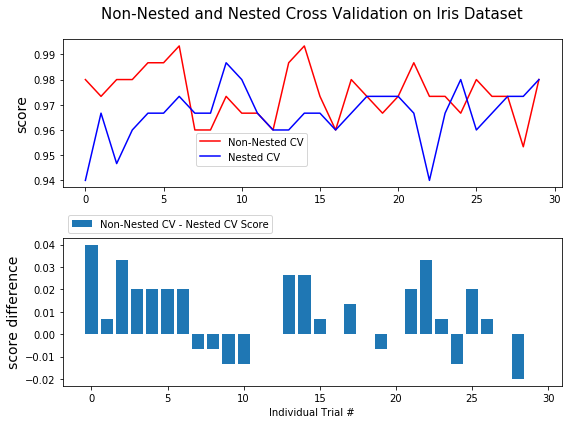

In [220]:
# However, other other values are not always so clean
# So it is not always clear that nested CV is always worth it because it is MUCH more computationally expensive
# that "vanilla" k-fold CV, specifically, k_outer times more expensive since "vanilla"  is just one outer loop
# essentially.
sklearn_nested_cv_example(k_inner=2, k_outer=5)

## Using that to compare different models

This example comes from "Python Machine Learning, 2nd Ed." by Raschka & Mirjalili.

Note that when comparing different estimators, often we have varying degrees of complexity, however, this is defined.  A rule of thumb often employed is the "one standard deviation rule" which states that you can take the most parsimonious model (again, can be subjective) whose performance is not more than one standard deviation away from the best performing model.
 - Hastie et al., "The Elements of Statistical Learning" (2008).

In [239]:
from sklearn.datasets import load_breast_cancer
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

In [244]:
k_inner = 2
k_outer = 5

data = load_breast_cancer()
X, y = data.data, data.target

# SVC vs. Decision Tree
def compare_pipelines(X_train, y_train):
    pipe_svc = make_pipeline(StandardScaler(),
                             SVC(random_state=1))
    param_range = [0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0]
    param_grid = [{'svc__C': param_range, 
                   'svc__kernel': ['linear']},
                  {'svc__C': param_range, 
                   'svc__gamma': param_range, 
                   'svc__kernel': ['rbf']}]
    gs_svc = GridSearchCV(estimator=pipe_svc,
                      param_grid=param_grid,
                      scoring='accuracy',
                      cv=k_inner)
    scores = cross_val_score(gs_svc, X_train, y_train, 
                             scoring='accuracy', cv=k_outer)
    print('%dx%d Nested CV accuracy for SVC: %.3f +/- %.3f' % (k_outer, k_inner, np.mean(scores), np.std(scores)))


    gs_tree = GridSearchCV(estimator=DecisionTreeClassifier(random_state=0),
                      param_grid=[{'max_depth': [1, 2, 3, 4, 5, 6, 7, None]}],
                      scoring='accuracy',
                      cv=k_inner)
    scores = cross_val_score(gs_tree, X_train, y_train, scoring='accuracy', cv=k_outer)
    print('%dx%d Nested CV accuracy for Tree: %.3f +/- %.3f' % (k_outer, k_inner, np.mean(scores), np.std(scores)))


### Option 1: No test/train split

In [245]:
# 1. Nested CV to estimate performances of different algorithms
# Check that standard deviation is small
compare_pipelines(X, y)

5x2 Nested CV accuracy for SVC: 0.974 +/- 0.005
5x2 Nested CV accuracy for Tree: 0.916 +/- 0.013


In [246]:
# 2. Take the best algorithm and do CV on the data set to optimize hyperparameters
# It looks likes the SVC is a better algorithm, so let's rerun K-Fold CV to choose the set of hyperparameters
# for our final model.
pipe_svc = make_pipeline(StandardScaler(), SVC(random_state=1))
param_range = [0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0]
param_grid = [{'svc__C': param_range, 'svc__kernel': ['linear']},
              {'svc__C': param_range, 'svc__gamma': param_range, 'svc__kernel': ['rbf']}]
gs_svc = GridSearchCV(estimator=pipe_svc,
                      param_grid=param_grid,
                      scoring='accuracy',
                      refit=True, # (Default) Refits the best estimator on the entire dataset
                      cv=10) # Now, let's do more folds to get a more stable estimate of optimal hyperparameters

# 3. Train on whole data set to produce production model
# This automatically finds and stores the best hyperparameters.
# Because refit=True, the best estimator is refit on the entire dataset automatically
_ = gs_svc.fit(X, y)

In [247]:
# We take the final model (saved in gs_svc) as our production model
production_model = gs_svc.best_estimator_

# We report the performance of the model as 
# production_model_generalization_error = 0.974 +/- 0.005

### Option 2: Hold out some test data

In [267]:
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    shuffle=True,
                                                    random_state=0,
                                                    stratify=y,
                                                    test_size=0.2)

# 1. Nested CV to estimate performances of different algorithms on training set
# Again, SVC wins.
compare_pipelines(X_train, y_train)

5x2 Nested CV accuracy for SVC: 0.974 +/- 0.009
5x2 Nested CV accuracy for Tree: 0.930 +/- 0.019


In [268]:
# 2. Take the best algorithm and do CV on the complete training set to optimize hyperparameters
pipe_svc = make_pipeline(StandardScaler(), SVC(random_state=1))
param_range = [0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0]
param_grid = [{'svc__C': param_range, 'svc__kernel': ['linear']},
              {'svc__C': param_range, 'svc__gamma': param_range, 'svc__kernel': ['rbf']}]
gs_svc = GridSearchCV(estimator=pipe_svc,
                      param_grid=param_grid,
                      scoring='accuracy',
                      refit=True, # (Default) Refits the best estimator on the entire dataset it was shown
                      cv=10) # Now, let's do more folds to get a more stable estimate of optimal hyperparameters
gs_svc.fit(X_train, y_train)

# 3. Estimate error on test set (should be similar to that found in 1) after training on all of test set
# The refit=True options means the model with the best set of hyperparameters is retrained with all train data
print('Generalization accuracy = {}'.format('%.3f'%gs_svc.score(X_test, y_test)))

Generalization accuracy = 0.982


In [270]:
# 4. Re-train on whole dataset to send into production
production_model = gs_svc.best_estimator_
_ = production_model.fit(X, y)

# We report the accuracy as 98.2% on the test set as generalization error.
# We could also report the 97.4 +/- 0.9% - to be sure, we want that to be close to the error found on the 
# test set, which it is here.

# Repeated K-Fold CV

Sometimes k-fold CV results can still be noisy, having a broad distribution of scores from fold to fold.  One way to get a more consistent estimate of **mean performance** can be to increase the value of k if the problem is that the model needs more data to train well, though this reduces the amount of data it is tested on.  Another way is to repeat the CV many times and report the average across all folds. The RNG seed determines how the data is split (and also, if it is shuffled or stratified additional randomness can be introduced) and therefore we could get different folds if we run the algorithm multiple times.

For example, if you repeat $k$-fold CV $m$ times, then you have $k\times m$ test sets you measure model performance on.  This takes the same dataset but splits it up into $m$ different ways to create $k$ partitions.  Because of the large computational expense, this is usually only viable for small datasets; however, you usually only need to do this for small ones anwyay, since large datasets tend to produce less noisy results.

In my experience, this does not usually change by a lot especially if the dataset is reasonably sized and the model not overly complex (do it does not overfit a small subset of data).  You can just substitute, for example, the KFold() cv in the inner loop of nested CV with a RepeatedKFold cv to incorporate it into nested CV; however, nested CV is already expensive and this just further increases the cost.

One of those methods is to do the nested k-fold CV as described above and use the "one standard deviation" rule of taking the most parsimonious model that is no more than 1 std. dev. away from the best performer (whose st. dev. to use?).  This is a rule of thumb, not rigorous; statistical hypothesis testing might provide a more rigorous approach.

Another use for repeated k-fold CV is to compare different ML models to assess their relative performance.  Because of the repetition, you can get a good mean and error estimate of each model to perform a t-test to see if one statistically outperforms others.  The big caveat is that those tests assume the independence of each "measurement" - however, because we are using the same data over and over (just shuffled around essentially) they are not truly decorrelated.  How to correct for this correlation has been the subject of much research, and there is no exact answer.  There are however, some standardized techniques employed to help reduce this effect.

There is an unfortunate confusion in terminology since nested CV is somtimes referred to as $m \times n$ *nested* CV, while repeated CV is just called $m \times n$ CV.  Because of the cost $5 \times 2$ nested CV is commonly employed, but historically, $5 \times 2$ repeated CV has been used to compare model performances by using statistical tests.  Both are sometimes referred to as simply $5 \times 2$ CV, but they are **not the same.**

See this stackexchange [discussion](https://stats.stackexchange.com/questions/151710/nested-cross-validation-how-is-it-different-from-model-selection-via-kfold-cv).

An [influential paper by Dierrerich](http://citeseerx.ist.psu.edu/viewdoc/download?doi=10.1.1.37.3325&rep=rep1&type=pdf) studied different approximate statistical tests for comparing algorithms. He considered [paired t-tests](https://www.jmp.com/en_us/statistics-knowledge-portal/t-test/paired-t-test.html), [McNemar's test](https://en.wikipedia.org/wiki/McNemar%27s_test), 10-fold CV, and $5 \times 2$ repeated CV scheme.  The last test was shown to be the most powerful and have low [Type I error](https://en.wikipedia.org/wiki/Type_I_and_type_II_errors) (false positives, i.e., incorrectly detecting a difference when there is none).

"For algorithms that can be executed only once, McNemar's test is the only test with acceptable Type I error. For algorithms that can be executed ten times, the 5x2cv test is recommended, because it is slightly more powerful and because it directly measures variation due to the choice of training set." - Dietterich 1997

> Type I error is the rejection of the null hypothesis.  In [frequentist statistics](https://www.statisticshowto.com/frequentist-statistics/) the null hypothesis is usually formulated so that the onus is one proving a difference between to things (e.g., the difference of 2 means), and is usually [stated as](https://www.statisticshowto.com/probability-and-statistics/null-hypothesis/#state) the currently accepted [truth](https://www.statisticshowto.com/probability-and-statistics/hypothesis-testing/).  The burden of proof then falls on the researcher to disprove this and reject the current status quo in favor of something else.

Jason Brownlee's [blog post](https://machinelearningmastery.com/statistical-significance-tests-for-comparing-machine-learning-algorithms/) talks about these results in more depth, and you can read Dietterich's paper, which is quite accessible.  Brownlee also has a nivce [example](https://machinelearningmastery.com/mcnemars-test-for-machine-learning/) for McNemar's test in action, though we will not consider that here.

$5 \times 2$ repeated CV is easy enough to do that it is commonly employed in [kaggle competitions](https://www.kaggle.com/ogrellier/parameter-tuning-5-x-2-fold-cv-statistical-test).

## Repeated CV decreases uncertainty in error estimate

This example is based on Jason Brownlee's [post](https://machinelearningmastery.com/repeated-k-fold-cross-validation-with-python/).

In [297]:
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression

# Create a small dataset
X_train, y_train = make_classification(n_samples=100, n_features=10, n_informative=5, n_redundant=5, random_state=1)

# In this case, we are just doing this calculation to show how the CV results vary (their standard deviation).
# If this were a real scenario, we would do test/train splitting and just work with the test data.
cv = StratifiedKFold(n_splits=5, random_state=1, shuffle=True)
model = LogisticRegression()
%timeit -n 10 scores = cross_val_score(model, X_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1)

# What does CV look like?
print('Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))

The slowest run took 7.06 times longer than the fastest. This could mean that an intermediate result is being cached.
37.5 ms ± 39.2 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
Accuracy: 0.888 (0.076)


In [298]:
from sklearn.model_selection import RepeatedStratifiedKFold

cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=10, random_state=0)
%timeit -n 10 scores = cross_val_score(model, X_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1)

# What does CV look like now?  Better (lower std) but not by that much. Was it worth 5x the computing time?
print('Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))

146 ms ± 2.66 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
Accuracy: 0.888 (0.076)


## Using repeats to compare models

The null hypothesis is usually formulated as being that the 2 models perform the same, i.e., have the same accuracy.
* Fail to Reject $H_0$: any difference between the models is due to noise - choose the simplest, most interpretable one.
* Reject $H_0$: the difference is real!  Now you need to decide if it is worth it; often more complicated models are more accurate, but at the expense of interpretability.

Idea 1: Split data in k-folds, and **using the same data split** evaluate each model.  Then, obtain mean and standard deviation for each model and perform a paired [Student's t-test](https://en.wikipedia.org/wiki/Student%27s_t-test).  If we use the same data split then both models are tested on the same "chunk" so we used the paired version.  However, a key assumption of the t-test (not even paired, just in general) is that observations/measurements are independent. The problem is that a single data point contributed to $k-1$ training sets; therefore the scores estimated from the remaining fold will be correlated because they are trained on some of the same data.

> Note that when $k=2$ this problem goes away!

Idea 2: Simply doing repeated test/train splits, without k-folds, make the problem even worse because now the test sets are also NOT disjoint.  This is the "resampled t-test" - according to Dietterich: "A series of (usually) 30 trials is conducted. In each trial, the available sample S is randomly divided into a training set R of a specified size (e.g., typically two thirds of the data) and a test set T. Learning algorithms A and B are both trained on R and the resulting classifiers are tested on T."  **This is outright the absolute worst thing you can do.**

**Idea 3: $5 \times 2$ paired t-test.**  Here, we do 2-fold CV, 5 different times.  For a single CV, the test/train sets are disjoint between the 2 folds (they just trade places).  This helps solve the independence problem, but we have only 2 numbers to average which makes it noisy.  Repeating it 5 times helps average this out.  This is done by choosing different ways to split the data in half for the 2-fold CV; however, clearly this is all still the same data which means the 5 (noisy) estimates are correlated.  Still, this seems to work fairly well.   Maybe this is because correlation between noisy estimates doesn't have as much impact because the inherent noise overwhelms much of that effect.  Even if we more than 2 inner folds the test sets are at least non-overlapping as in Idea 1.  If we were doing $5 \times 2$ **nested** CV, I assume the correlation would further decrease, for the same reason that Idea 1 is better than Idea 2.

---

Subsequent refinements:

1. In 2004, [Bouckaert & Frank](https://link.springer.com/chapter/10.1007/978-3-540-24775-3_3) argued that reproducility is more important than minimizing Type I error; this depends strongly on how the data is partitioned since different researchers will probably have different RNG seeds when trying to repeat each others' work. Instead they recommend either (a) 100 runs of random resampling or (b) 10×10 repeated cross-validation with the Nadeau and Bengio correction (discussed below).  Interestingly, (a) is the worst thing according to Dietterich.

2. Use the [Nadeau & Bengio correction](https://link.springer.com/article/10.1023/A:1024068626366) in your t-statistic which is designed to "overestimate the variance to yield conservative inference."  It seems this can be applied to both (a) and (b) above and is known as the "corrected resampled t-test" for (a).  While 10x10 repeated CV is recommended in (1) it can just as easily be applied to Dietterich's 5x2 method which is 10 times cheaper to evaluate!

This correction factor just modifies the denominator in the t statistic. (note that Dietterichs original 5x2 cv uses a different numerator, see [here](https://link.springer.com/chapter/10.1007/978-3-540-24775-3_3)) For the resampled case the difference is as follows:

* Resampled t-test: $n$ runs performed, where the difference in performance between algorithms a and b for run $j$ is $x_j = a_j - b_j$, and $\hat{\sigma}^2 = \frac{1}{n-1}\sum(x_j - \bar{x})^2$ (unbiased sample variance).  This is used with the Student's t distribution and $n-1$ degrees of freedom. $n_1$ is the fraction of the data used from training, and $n_2$ for testing.
$$
t = \frac{ \frac{1}{n} \sum_{j=1}^n x_j}{\sqrt{ \hat{\sigma}^2 } /\sqrt{n} } =  \frac{ \frac{1}{n} \sum_{j=1}^n x_j}{\sqrt{ \frac{1}{n} \hat{\sigma}^2 } }
$$

* Corrected Resampled t-test:
$$
t = \frac{ \frac{1}{n} \sum_{j=1}^n x_j}{\sqrt{ \left(\frac{1}{n}+\frac{n_2}{n_1}\right) \hat{\sigma}^2}   }
$$

Similarly, for repeated k-fold CV when we have $r \times k$-fold CV and $x_{i,j} = a_{i,j} - b_{i,j}$ for fold $i$ and repeat $j$, then $\hat{\mu} = \frac{1}{kr} \sum_{i=1}^k \sum_{j=1}^r x_{i,j}$, and $\sigma^2 =\frac{1}{kr-1} \sum_{i=1}^k \sum_{j=1}^r (x_{i,j} - \mu)^2$.  The corrected t statistic we use (with kr-1 degrees of freedom) is:

* Corrected Repeated k-fold cv t-test:
$$
t = \frac{ \hat{\mu} }{\sqrt{ \left(\frac{1}{kr}+\frac{n_2}{n_1}\right) \hat{\sigma}^2}   }
$$

Again, even though the $r \times k$ repeated CV is not nested, nesting simply helps decorrelate the overall samples.  As long as both pipelines you are comparing are tested on exactly the same splits of t data you can use this.

### Nested CV example

In [332]:
# Let's go back to our first example to re-examine nested k-fold CV

""" Extract test scores from the GridSearch object. """
def get_test_scores(gs):
    # From the grid, extract the results from the hyperparameter set with the best mean 
    # test score (lowest rank = best)
    best_set_idx = np.argmin(gs.cv_results_['rank_test_score'])
    
    # Get scores "in order" for consistency to do paired t-test
    scores = []
    k = len([k for k in gs.cv_results_.keys() if 'split' in k and '_test_score' in k])
    for i in range(k):
        scores.append(gs.cv_results_['split{}_test_score'.format(i)][best_set_idx])
    return np.array(scores)

""" Unfortunately, cross_val_score() doesn't save individual results so we have to do this manually. """
def outer_loop(pipeline, X, y, cv):
    scores = []
    for train_index, test_index in cv.split(X, y):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        
        pipeline.fit(X_train, y_train)
                    
        # We don't actually use the test set here!
        # Unlike nested CV where we have k_outer test score estimates, now
        # we are just going to use the inner fold scores.  The outer fold
        # essentially just serves to  slightly "shift" the data  which help sdecorrelate
        # different repeats of the inner fold.  The "basic" alternative is not 
        # to bother with the "outer fold" and just repeat the inner fold 
        # procedure k_outer times (on the same data).
        scores = np.concatenate((scores, get_test_scores(pipeline)))
        
    return scores

# Do 5x2 NESTED CV
k_inner = 2
k_outer = 5

# Do not bother with test/train split and just use all data to 
data = load_breast_cancer()
X_train, y_train = data.data, data.target

# Pipeline 1: SVC
pipe_svc = make_pipeline(StandardScaler(), SVC(random_state=1))
param_range = [0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0]
param_grid = [{'svc__C': param_range, 'svc__kernel': ['linear']},
              {'svc__C': param_range, 'svc__gamma': param_range, 'svc__kernel': ['rbf']}]
gs_svc = GridSearchCV(estimator=pipe_svc,
                      param_grid=param_grid,
                      scoring='accuracy',
                      cv=StratifiedKFold(n_splits=k_inner, 
                                         random_state=1, # Set random state so that other pipeline does same split
                                         shuffle=True),
                      return_train_score=True # This causes the results from the test folds to be stored 
                     ) 
scores_svc = outer_loop(gs_svc, 
                        X_train, 
                        y_train, 
                        cv=StratifiedKFold(n_splits=k_outer, 
                                            random_state=1, # Again, to ensure same split for second pipeline
                                            shuffle=True)
                       )


# Pipeline 2: Tree
gs_tree = GridSearchCV(estimator=DecisionTreeClassifier(random_state=0),
                       param_grid=[{'max_depth': [1, 2, 3, 4, 5, 6, 7, None]}],
                       scoring='accuracy',
                       cv=StratifiedKFold(n_splits=k_inner, 
                                          random_state=1, # To ensure same split as first pipeline
                                          shuffle=True),
                       return_train_score=True # This causes the results from the test folds to be stored 
                      )
scores_tree = outer_loop(gs_tree, 
                        X_train, 
                        y_train, 
                        cv=StratifiedKFold(n_splits=k_outer, 
                                            random_state=1, # Again, to ensure same split for second pipeline
                                            shuffle=True)
                       )

In [333]:
print('Mean for SVC: {}\nMean for Tree: {}'.format('%.3f'%np.mean(scores_svc), '%.3f'%np.mean(scores_tree)))

Mean for SVC: 0.973
Mean for Tree: 0.932


In [335]:
# Since SVC > Tree we could formulate the 1-sided hypothesis that:
# H_0: mean(tree) == mean(svc)
# H_1: mean(svc) > mean(tree)

""" Do a 1-sided H test to see if pipeline 1 is better than 2 """
def one_sided_test(scores1, scores2, n_repeats):
    import scipy.stats
    assert(len(scores1) == len(scores2)), 'scores must have the same overall length'
    k_fold = len(scores1) // int(n_repeats) # k is inferred from the size of scores and n_repeats
    n = k_fold*n_repeats
    assert(n == len(scores1)), 'scores must be divisible by n_repeats'
    
    rho = 1.0/k_fold
    performance_diffs = np.array(scores1) - np.array(scores2) # H1: mu > 0
    corrected_t = (np.mean(performance_diffs) - 0.0) / np.sqrt((1.0/n + rho/(1.0-rho))*(np.std(performance_diffs, ddof=1)**2))

    return 1.0 - scipy.stats.t.cdf(x=corrected_t, df=n-1) # 1-sided test

In [ ]:
p_value = one_sided_test(scores_svc, scores_tree, n_repeats=k_outer)

In [339]:
# Reject H0 in favor of H1 if p < alpha
alpha = 0.05
if p_value < alpha:
    print('Rejecting H0 ({} < {}) so SVC is better than the Tree!'.format('%.3f'%p_value, '%.3f'%alpha))
else:
    print('Fail to reject H0 ({} >= {}) so we cannot tell if SVC is better than Tree'.format('%.3f'%p_value, '%.3f'%alpha))

Rejecting H0 (0.048 < 0.050) so SVC is better than the Tree!


### Non-nested CV (the more common, simple repeated CV)

In [348]:
""" Simply repeat the CV but with a different RNG seed. """
def repeated_kfold(X, y, k_outer, k_inner, pipeline, param_grid):
    scores = []
    for i in range(k_outer):
        gs = GridSearchCV(estimator=pipeline,
                          param_grid=param_grid,
                          scoring='accuracy',
                          cv=StratifiedKFold(n_splits=k_inner, 
                                             random_state=i, 
                                             shuffle=True),
                          return_train_score=True 
                         )
        gs.fit(X, y)
        scores = np.concatenate((scores, get_test_scores(gs)))
    return scores
    
param_range = [0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0]
param_grid = [{'svc__C': param_range, 'svc__kernel': ['linear']},
              {'svc__C': param_range, 'svc__gamma': param_range, 'svc__kernel': ['rbf']}]
scores_svc = repeated_kfold(X_train, y_train, k_outer, k_inner, pipe_svc, param_grid)

scores_tree = repeated_kfold(X_train, y_train, k_outer, k_inner, 
                             DecisionTreeClassifier(random_state=0), 
                             [{'max_depth': [1, 2, 3, 4, 5, 6, 7, None]}])


In [350]:
print('Mean for SVC: {}\nMean for Tree: {}'.format('%.3f'%np.mean(scores_svc), '%.3f'%np.mean(scores_tree)))

Mean for SVC: 0.980
Mean for Tree: 0.928


In [352]:
p_value = one_sided_test(scores_svc, scores_tree, n_repeats=k_outer)

In [353]:
# Reject H0 in favor of H1 if p < alpha
alpha = 0.05
if p_value < alpha:
    print('Rejecting H0 ({} < {}) so SVC is better than the Tree!'.format('%.3f'%p_value, '%.3f'%alpha))
else:
    print('Fail to reject H0 ({} >= {}) so we cannot tell if SVC is better than Tree'.format('%.3f'%p_value, '%.3f'%alpha))

Rejecting H0 (0.004 < 0.050) so SVC is better than the Tree!


We are almost 10x more confident (lower p) in this case - although the result is the same this is why nested CV can be beneficial if you are willing to split up the data a bit.

# Bayesian Comparison

See "Time for a Change: a Tutorial for Comparing Multiple Classifiers Through Bayesian Analysis", Alessio Benavoli, Giorgio Corani, Janez Demšar, Marco Zaffalon. Journal of Machine Learning Research, 18 (2017) 1-36.

They have an associated [github repo](https://github.com/janezd/baycomp) and [documentation](https://baycomp.readthedocs.io/en/latest/) that discusses the advantages of using Bayesian methods to compare ML pipelines instead of frequentist statistics (hypothesis testing).

More discussion [here](https://www.statisticshowto.com/probability-and-statistics/hypothesis-testing/) on the argument for (and against) using Bayesian statistics instead of frequentist.